Source: https://cgarciae.github.io/einops/1-einops-basics/

In [2]:
# Examples are given for `numpy`. This code also setups ipython/jupyter so that numpy arrays in the output are displayed as images
import numpy
from utils import display_np_arrays_as_images
display_np_arrays_as_images()

In [3]:
ims = numpy.load('./resources/test_images.npy', allow_pickle=False)
# There are 6 images of shape 96x96 with 3 color channels packed into tensor
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


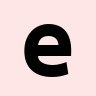

In [4]:
# display the first image (whole 4d tensor can't be rendered)
ims[0]

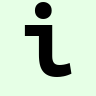

In [5]:
# second image in a batch
ims[1]

In [6]:
# we'll use three operations
from einops import rearrange, reduce, repeat

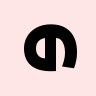

In [7]:
# rearrange, as its name suggests, rearranges elements
# below we swapped height and width.
# In other words, transposed first two axes (dimensions)
rearrange(ims[0], 'h w c -> w h c')

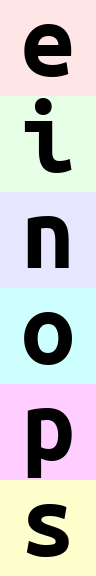

In [8]:
# einops allows seamlessly composing batch and height to a new height dimension
# We just rendered all images by collapsing to 3d tensor!
rearrange(ims, 'b h w c -> (b h) w c')

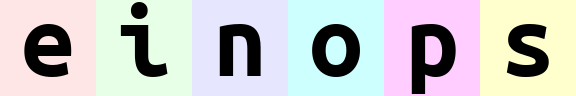

In [9]:
# or compose a new dimension of batch and width
rearrange(ims, 'b h w c -> h (b w) c')

In [10]:
# decomposition is the inverse process - represent an axis as a combination of new axes
# several decompositions possible, so b1=2 is to decompose 6 to b1=2 and b2=3
rearrange(ims, '(b1 b2) h w c -> b1 b2 h w c ', b1=2).shape

(2, 3, 96, 96, 3)

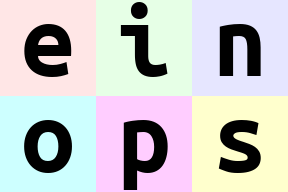

In [11]:
# finally, combine composition and decomposition:
rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c ', b1=2)

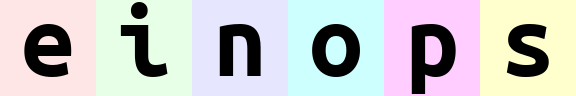

In [12]:
# compare with the next example
rearrange(ims, 'b h w c -> h (b w) c')

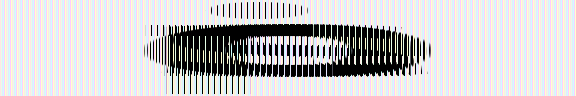

In [13]:
# order of axes in composition is different
# rule is just as for digits in the number: leftmost digit is the most significant, 
# while neighboring numbers differ in the rightmost axis.

# you can also think of this as lexicographic sort
rearrange(ims, 'b h w c -> h (w b) c')

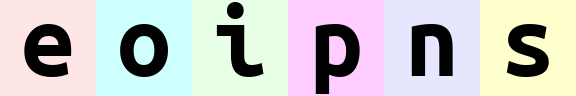

In [14]:
# what if b1 and b2 are reordered before composing to width?
rearrange(ims, '(b1 b2) h w c -> h (b1 b2 w) c ', b1=2) # produces 'einops'
rearrange(ims, '(b1 b2) h w c -> h (b2 b1 w) c ', b1=2) # produces 'eoipns'

Other sources: https://einops.rocks/pytorch-examples.html

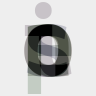

In [15]:
# average over batch
reduce(ims, 'b h w c -> h w c', 'mean')

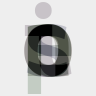

In [16]:
# the previous is identical to familiar:
ims.mean(axis=0)
# but is so much more readable

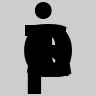

In [17]:
# Example of reducing of several axes 
# besides mean, there are also min, max, sum, prod
reduce(ims, 'b h w c -> h w', 'min')

In [18]:
# rearrange can also take care of lists of arrays with the same shape
x = list(ims)
print(type(x), 'with', len(x), 'tensors of shape', x[0].shape)
# that's how we can stack inputs
# "list axis" becomes first ("b" in this case), and we left it there
rearrange(x, 'b h w c -> b h w c').shape

<class 'list'> with 6 tensors of shape (96, 96, 3)


(6, 96, 96, 3)

In [23]:
# but new axis can appear in the other place:
rearrange(x, 'b h w c -> h w c b').shape

(96, 96, 3, 6)